# k-means Example
* Source : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
## Model Training
## Evaluation

array([1, 0], dtype=int32)

In [5]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

*[출처] [ML] IRIS 꽃 데이터 클러스터링 with KMeans|작성자 똑똑이

In [3]:
!pip install seaborn

Looking in indexes: http://aicentro-nexus-svc:8081/hub-nexus/repository/pypi-group/simple
     |████████████████████████████████| 225kB 24.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
# IRIS 꽃 데이터를 읽고 순서를 섞는다
iris_df = sns.load_dataset('iris').sample(frac=1).reset_index(drop=True)

In [7]:
# 사용할 X컬럼들과 Y컬럼을 지정한다
x_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y_column  = 'species'

In [8]:
# Y컬럼의 문자열값을 LabelEncoder를 통해 숫자로 바꾼다.
y_true_label_encoder = preprocessing.LabelEncoder()
y_true_encoded       = y_true_label_encoder.fit_transform(iris_df[y_column])

kMeansModels              = dict() # k값별 모델 저장할 딕셔너리
kMeansModelPreds          = dict() # k값별 모델 예측 결과 저장할 딕셔너리
kMeansModelLabelEncoder   = dict() # k값별 라벨인코더 저장할 딕셔너리

sumSquaredDistancesList   = list() # 샘플과 클러스터 센터간 거리 제곱의 합 리스트
silhouetteScoreList       = list() # Silhouette Coefficient 평균 리스트

ks = [2,3,4,5,6,7,8,9] # k값으로 2부터 9까지 테스트한다

In [9]:
for k in ks: # k값 순회
    model = KMeans(n_clusters=k, random_state=0, n_init=100)  # k개 클러스터로 모델 생성
    cluster_labels = model.fit_predict(iris_df[x_columns]) # X컬럼으로 지정된 필드값으로 피팅
    
    y_pred_label_encoder = preprocessing.LabelEncoder() # 예측한 클러스터에서 사용할 라벨인코더
    # 초기 임의 값 (unknown 1, unknown 2...) 으로 인코딩한다
    y_pred_label_encoder.fit(np.array(['unknown ' + str(i+1) for i in range(0, k, 1)], dtype=object))
    for pred_label_num in range(0,k,1): # 각 클러스터 순회        
        # 해당 클러스터에서 가장 많이 출력한 실제 값의 인덱스를 구한다
        most_frequent_index = np.argmax(np.bincount(y_true_encoded[cluster_labels==pred_label_num]))
        # 구한 인덱스의 라벨을 구해서 해당클러스터 라벨로 업데이트한다
        y_pred_label_encoder.classes_[pred_label_num] = y_true_label_encoder.classes_[most_frequent_index]
    
    kMeansModels[k]     = model                       # 모델 저장
    kMeansModelPreds[k] = cluster_labels              # 모델 예측결과 저장     
    kMeansModelLabelEncoder[k] = y_pred_label_encoder # 라벨인코더 저장
    sumSquaredDistancesList.append(model.inertia_)    # # 샘플과 클러스터 센터간 거리 제곱의 합 저장
    silhouetteScoreList.append(silhouette_score(iris_df[x_columns].values, cluster_labels)) # Silhouette Score저장

In [10]:
def render_plot(x_col='petal_length', y_col='petal_width', k=3):
    y_pred        = kMeansModelPreds[k]        # 모델 예측값
    label_encoder = kMeansModelLabelEncoder[k] # 라벨인코더
    
    # 원본과 예측값을 합쳐 데이터셋을 준비
    mdf = pd.concat([iris_df, pd.DataFrame(label_encoder.inverse_transform(y_pred), columns=[y_column+'_pred'])], axis=1)
    
    plt.figure(figsize=(15,8)) # 출력 크기를 지정
    
    ddf = mdf[mdf[y_column] != mdf[y_column+'_pred']] # 실제라벨과 예측라벨이 틀린 경우 추출
    # X기호로 error임을 표시한다
    plt.scatter(x=ddf[x_col], y=ddf[y_col], c='black', marker='x', s=300, label='error') 
    
    colors = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black'] # 컬러값 리스트
    for (idx,cls) in enumerate(list(y_true_label_encoder.classes_)):
        ddf = mdf[mdf[y_column] == cls] # 실제라벨 데이터는 작은 점으로 출력
        plt.scatter(x=ddf[x_col], y=ddf[y_col], c=colors[idx], marker='.', linewidths=3, s=50, label=cls)
        ddf = mdf[mdf[y_column+'_pred'] == cls] # 예측라벨 데이터는 큰 원으로 출력
        plt.scatter(x=ddf[x_col], y=ddf[y_col], c=colors[idx], marker='o', linewidths=13, s=2, label=cls+' pred')
    
    plt.legend();plt.xlabel(x_col);plt.ylabel(y_col)
    print('accuracy {:.2f}'.format(np.mean(mdf[y_column] == mdf[y_column+'_pred']))) # 정확도 출력
    plt.show()
    

accuracy 0.89


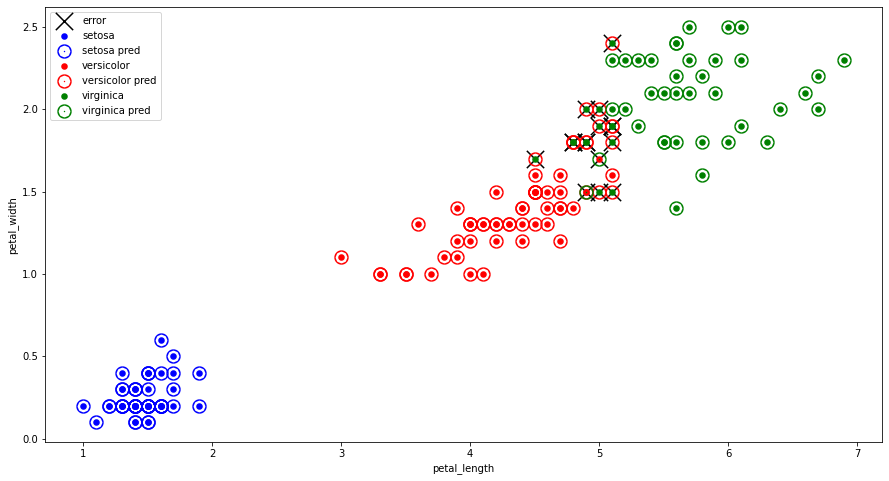

<function __main__.render_plot(x_col='petal_length', y_col='petal_width', k=3)>

In [10]:
interact(render_plot, x_col=x_columns, y_col=x_columns, k=ks)

## Model

In [12]:
model.cluster_centers_

array([[5.62857143, 2.72380952, 4.13333333, 1.2952381 ],
       [5.07142857, 3.5047619 , 1.53809524, 0.28095238],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.24285714, 2.37142857, 3.44285714, 1.02857143],
       [5.49      , 3.92      , 1.46      , 0.26      ],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [4.67894737, 3.08421053, 1.37894737, 0.2       ]])